In [2]:
# Importing Librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing The Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Preprocessing
#The X variable contains the first four columns of the dataset  while y contains the labels.

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_pred = classifier.predict(X_test)


In [10]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [11]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

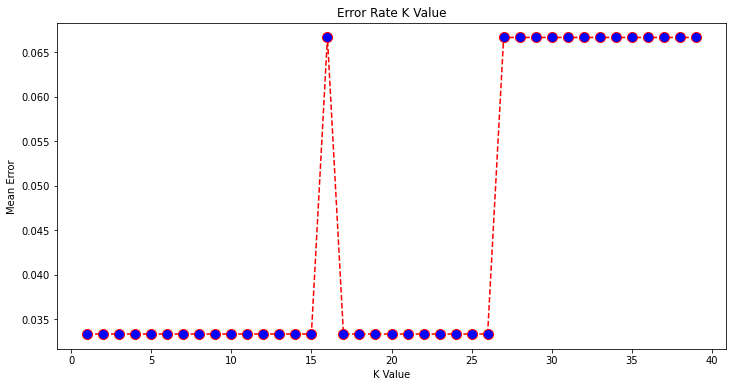

In [12]:
#plotting
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### **KNN from scratch **

In [16]:
import csv
import random

# load irist dataset and randomly split it into test set and training set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'rt') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


#############################
# SIMILARITY CHECK FUNCTION #
#############################

# euclidean distance calcualtion

import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)



############################################################
# NEIGHBOURS - selecting subset with the smallest distance #
############################################################

import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors



######################
# PREDICTED RESPONSE #
######################

import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]



######################
# MEASURING ACCURACY #
######################

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] in predictions[x]: 
			correct = correct + 1
			
	return (correct/float(len(testSet))*100) 

def main():
	# prepare data
	trainingSet=[]
	testSet=[]
	split = 0.67
	loadDataset('iris.data', split, trainingSet, testSet)
	print ('Train set: ' + repr(len(trainingSet)))
	print ('Test set: ' + repr(len(testSet)))
	# generate predictions
	predictions=[]
	k = 3
	for x in range(len(testSet)):
		neighbors = getNeighbors(trainingSet, testSet[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		# print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	
main()

Train set: 89
Test set: 61
Accuracy: 98.36065573770492%
